In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve


import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense

import warnings

In [117]:
warnings.filterwarnings(action='ignore')

Download dataset and load dataset with dataframe

For more info about dataset specification, visit the Kaggle site 

https://www.kaggle.com/code/girishvutukuri/exercise-insurance-fraud
    

In [118]:
tc = pd.read_csv('../../data/insurance/TrainData/TrainData/Train_Claim.csv')
target = pd.read_csv('../../data/insurance/TrainData/TrainData/Traindata_with_Target.csv')
demo = pd.read_csv('../../data/insurance/TrainData/TrainData/Train_Demographics.csv')

In [119]:
# Target is label data whether fraud or not.

target

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y
...,...,...
28831,Cust9773,N
28832,Cust38439,N
28833,Cust38444,N
28834,Cust26466,N


In [120]:
# tc dataframe is features which will be trained and tested.

tc

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,1,NO,0,3,?,6590,870,1078,4642
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,1,YES,0,2,YES,74547,14699,7875,51973
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,1,YES,2,0,YES,55305,7043,7043,41219
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,1,?,2,0,YES,55830,7059,7059,41712


In [121]:
# To merge tc(feautures) and target as dataframe named 'data'

tc = tc.sort_values('CustomerID')

target = target.sort_values('CustomerID')

data = pd.merge(tc, target, how='inner')
data.shape

(28836, 20)

In [122]:
data.isnull().sum()

CustomerID               0
DateOfIncident           0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
ReportedFraud            0
dtype: int64

### Preprocessing 

In [123]:
# Removing string in data['CustomeID'] seriees

cust_name  = data['CustomerID'].str.split("Cust", n=1, expand=True )
cust_name.columns = ['nan', 'CustomerID']
cust_name = cust_name[['CustomerID']]
cust_name

,CustomerID
0,10000
1,10001
2,10002
3,10003
4,10004
...,...
28831,9993
28832,9994
28833,9996
28834,9997


In [124]:
# Replace numeric customerID processed as above with original data 

data.drop('CustomerID', axis=1, inplace=True)
data.insert(0, 'CustomerID', cust_name)
data['CustomerID'].astype(np.int32)
data

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud
0,10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013,N
1,10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903,N
2,10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495,N
3,10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237,N
4,10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,1,NO,0,3,?,6590,870,1078,4642,N
28832,9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,1,YES,0,2,YES,74547,14699,7875,51973,N
28833,9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,1,YES,2,0,YES,55305,7043,7043,41219,N
28834,9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,1,?,2,0,YES,55830,7059,7059,41712,N


In [125]:
data.shape

(28836, 20)

### List all columns which needs one-hot-encoding

In [126]:
# Applying One hot encoding for categorical data by Pandas get_dummies library
data_label = ['TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'PropertyDamage' ,'PoliceReport']

data_label = pd.get_dummies(data[data_label])

In [127]:
# data_int is numberic data

data_int = data[['CustomerID',
 'IncidentTime',
 'NumberOfVehicles',
 'BodilyInjuries',
 'Witnesses',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage',
 'ReportedFraud'              
 ]]

In [128]:
data = pd.concat([data_int, data_label], axis=1)

data

,CustomerID,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud,TypeOfIncident_Multi-vehicle Collision,...,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,PropertyDamage_?,PropertyDamage_NO,PropertyDamage_YES,PoliceReport_?,PoliceReport_NO,PoliceReport_YES
0,10000,17,3,1,0,13417,6071,46013,N,1,...,0,1,0,0,1,0,0,1,0,0
1,10001,10,3,2,1,15560,5919,39903,N,1,...,0,1,0,0,0,0,1,0,0,1
2,10002,22,1,2,3,11630,11630,43495,N,0,...,0,0,1,0,0,0,1,0,1,0
3,10003,22,1,2,3,12003,12003,42237,N,0,...,0,0,0,1,0,0,1,0,1,0
4,10004,10,1,2,1,8829,7234,37481,N,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,9993,3,1,0,3,870,1078,4642,N,0,...,0,0,0,1,0,1,0,1,0,0
28832,9994,17,1,0,2,14699,7875,51973,N,0,...,0,0,1,0,0,0,1,0,0,1
28833,9996,1,1,2,0,7043,7043,41219,N,0,...,0,0,0,1,0,0,1,0,0,1
28834,9997,1,1,2,0,7059,7059,41712,N,0,...,0,0,0,1,1,0,0,0,0,1


In [129]:
data['Witnesses'].value_counts()

# Label encoding "MISSINGVALUE" as 4
data.loc[data['Witnesses'] == 'MISSINGVALUE'] = 4

In [130]:
data['ReportedFraud'].value_counts()

N    21018
Y     7772
4       46
Name: ReportedFraud, dtype: int64

In [131]:
# Set label data to numeric data for training
data.replace({'ReportedFraud':'N'},0., inplace=True)
data.replace({'ReportedFraud':'Y'},1., inplace=True)

In [132]:
data.loc[data['ReportedFraud'] == 4]

,CustomerID,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud,TypeOfIncident_Multi-vehicle Collision,...,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,PropertyDamage_?,PropertyDamage_NO,PropertyDamage_YES,PoliceReport_?,PoliceReport_NO,PoliceReport_YES
1084,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
1146,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
2010,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
2075,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
2202,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
3673,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
3917,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
4251,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
4873,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
5345,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4


In [133]:
# Drop data in dataframe which have only 4 in the row
# load data dataframe as df

df = data[data['CustomerID'] != 4]
df

,CustomerID,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud,TypeOfIncident_Multi-vehicle Collision,...,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,PropertyDamage_?,PropertyDamage_NO,PropertyDamage_YES,PoliceReport_?,PoliceReport_NO,PoliceReport_YES
0,10000,17,3,1,0,13417,6071,46013,0.0,1,...,0,1,0,0,1,0,0,1,0,0
1,10001,10,3,2,1,15560,5919,39903,0.0,1,...,0,1,0,0,0,0,1,0,0,1
2,10002,22,1,2,3,11630,11630,43495,0.0,0,...,0,0,1,0,0,0,1,0,1,0
3,10003,22,1,2,3,12003,12003,42237,0.0,0,...,0,0,0,1,0,0,1,0,1,0
4,10004,10,1,2,1,8829,7234,37481,0.0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,9993,3,1,0,3,870,1078,4642,0.0,0,...,0,0,0,1,0,1,0,1,0,0
28832,9994,17,1,0,2,14699,7875,51973,0.0,0,...,0,0,1,0,0,0,1,0,0,1
28833,9996,1,1,2,0,7043,7043,41219,0.0,0,...,0,0,0,1,0,0,1,0,0,1
28834,9997,1,1,2,0,7059,7059,41712,0.0,0,...,0,0,0,1,1,0,0,0,0,1


In [134]:
feature_names = df.columns.to_list()
feature_names.remove('ReportedFraud')
feature_names

['CustomerID',
 'IncidentTime',
 'NumberOfVehicles',
 'BodilyInjuries',
 'Witnesses',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage',
 'TypeOfIncident_Multi-vehicle Collision',
 'TypeOfIncident_Parked Car',
 'TypeOfIncident_Single Vehicle Collision',
 'TypeOfIncident_Vehicle Theft',
 'TypeOfCollission_?',
 'TypeOfCollission_Front Collision',
 'TypeOfCollission_Rear Collision',
 'TypeOfCollission_Side Collision',
 'SeverityOfIncident_Major Damage',
 'SeverityOfIncident_Minor Damage',
 'SeverityOfIncident_Total Loss',
 'SeverityOfIncident_Trivial Damage',
 'AuthoritiesContacted_Ambulance',
 'AuthoritiesContacted_Fire',
 'AuthoritiesContacted_None',
 'AuthoritiesContacted_Other',
 'AuthoritiesContacted_Police',
 'IncidentState_State3',
 'IncidentState_State4',
 'IncidentState_State5',
 'IncidentState_State6',
 'IncidentState_State7',
 'IncidentState_State8',
 'IncidentState_State9',
 'PropertyDamage_?',
 'PropertyDamage_NO',
 'PropertyDamage_YES',
 'PoliceRepor

In [135]:
X = df[feature_names]
X

,CustomerID,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Parked Car,...,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,PropertyDamage_?,PropertyDamage_NO,PropertyDamage_YES,PoliceReport_?,PoliceReport_NO,PoliceReport_YES
0,10000,17,3,1,0,13417,6071,46013,1,0,...,0,1,0,0,1,0,0,1,0,0
1,10001,10,3,2,1,15560,5919,39903,1,0,...,0,1,0,0,0,0,1,0,0,1
2,10002,22,1,2,3,11630,11630,43495,0,0,...,0,0,1,0,0,0,1,0,1,0
3,10003,22,1,2,3,12003,12003,42237,0,0,...,0,0,0,1,0,0,1,0,1,0
4,10004,10,1,2,1,8829,7234,37481,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,9993,3,1,0,3,870,1078,4642,0,0,...,0,0,0,1,0,1,0,1,0,0
28832,9994,17,1,0,2,14699,7875,51973,0,0,...,0,0,1,0,0,0,1,0,0,1
28833,9996,1,1,2,0,7043,7043,41219,0,0,...,0,0,0,1,0,0,1,0,0,1
28834,9997,1,1,2,0,7059,7059,41712,0,0,...,0,0,0,1,1,0,0,0,0,1


In [136]:
label_name ='ReportedFraud'

In [137]:
y = df[['ReportedFraud']]
y

,ReportedFraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
28831,0.0
28832,0.0
28833,0.0
28834,0.0


In [138]:
# For Deep Learning set data type to float
df = df.astype(np.float32)

df.dtypes

CustomerID                                 float32
IncidentTime                               float32
NumberOfVehicles                           float32
BodilyInjuries                             float32
Witnesses                                  float32
AmountOfInjuryClaim                        float32
AmountOfPropertyClaim                      float32
AmountOfVehicleDamage                      float32
ReportedFraud                              float32
TypeOfIncident_Multi-vehicle Collision     float32
TypeOfIncident_Parked Car                  float32
TypeOfIncident_Single Vehicle Collision    float32
TypeOfIncident_Vehicle Theft               float32
TypeOfCollission_?                         float32
TypeOfCollission_Front Collision           float32
TypeOfCollission_Rear Collision            float32
TypeOfCollission_Side Collision            float32
SeverityOfIncident_Major Damage            float32
SeverityOfIncident_Minor Damage            float32
SeverityOfIncident_Total Loss  

In [139]:
# Spliting train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [140]:
X_train.shape

(21592, 38)

In [141]:
y_train.shape

(21592, 1)

In [142]:
X_test.shape

(7198, 38)

In [143]:
y_test.shape

(7198, 1)

# Load RandomFrest ( model Fit and predict )

In [144]:
model_random = RandomForestClassifier(random_state=2022)

In [145]:
model_random.fit(X_train, y_train)

RandomForestClassifier(random_state=2022)

In [146]:
y_predict = model_random.predict(X_test)

# Evaluation

In [147]:
print(classification_report(y_predict, y_test))
accuracy_score(y_predict, y_test)

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95      5546
         1.0       0.78      0.92      0.84      1652

    accuracy                           0.92      7198
   macro avg       0.88      0.92      0.89      7198
weighted avg       0.93      0.92      0.92      7198



0.9205334815226451

## Load anther ansemble model ( Fit and predict )

In [406]:
from sklearn.ensemble import HistGradientBoostingClassifier

model =  HistGradientBoostingClassifier(random_state=42)

y_predict = model.fit(X_train, y_train).predict(X_test)

In [407]:
from sklearn.metrics import accuracy_score

accuracy_score(y_predict, y_test)

0.9306751875520978

## SVC

In [51]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [52]:
pipe = Pipeline(steps=[
    ("Scale", StandardScaler()),
    ("Classifier", SVC())
])

In [53]:
y_predict = pipe.fit(X_train, y_train).predict(X_test)

In [54]:
accuracy_score(y_test, y_predict)

0.8845512642400667

# LGBM

In [427]:
from lightgbm import LGBMClassifier, plot_importance

In [428]:
clf = LGBMClassifier(n_estimators=500)

In [429]:
evals = [(X_test, y_test)]

In [430]:
clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)

[1]	valid_0's binary_logloss: 0.519058
[2]	valid_0's binary_logloss: 0.471464
[3]	valid_0's binary_logloss: 0.434323
[4]	valid_0's binary_logloss: 0.404216
[5]	valid_0's binary_logloss: 0.379489
[6]	valid_0's binary_logloss: 0.35796
[7]	valid_0's binary_logloss: 0.340625
[8]	valid_0's binary_logloss: 0.325244
[9]	valid_0's binary_logloss: 0.312713
[10]	valid_0's binary_logloss: 0.302079
[11]	valid_0's binary_logloss: 0.29258
[12]	valid_0's binary_logloss: 0.284949
[13]	valid_0's binary_logloss: 0.278487
[14]	valid_0's binary_logloss: 0.272809
[15]	valid_0's binary_logloss: 0.267983
[16]	valid_0's binary_logloss: 0.263238
[17]	valid_0's binary_logloss: 0.259326
[18]	valid_0's binary_logloss: 0.256303
[19]	valid_0's binary_logloss: 0.253614
[20]	valid_0's binary_logloss: 0.251466
[21]	valid_0's binary_logloss: 0.24954
[22]	valid_0's binary_logloss: 0.247928
[23]	valid_0's binary_logloss: 0.246663
[24]	valid_0's binary_logloss: 0.245698
[25]	valid_0's binary_logloss: 0.244457
[26]	valid_0

LGBMClassifier(n_estimators=500)

In [431]:
y_predict = clf.predict(X_test)

In [432]:
accuracy_score(y_test, y_predict)

0.932620172270075

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

<Figure size 1440x1080 with 0 Axes>

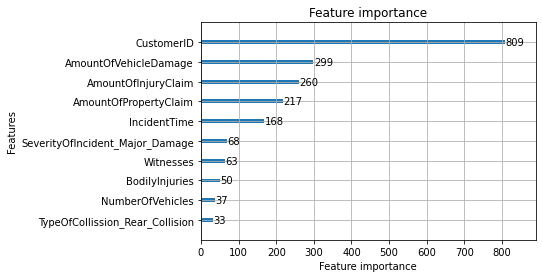

In [439]:
plt.figure(figsize=(20,15))
plot_importance(clf,max_num_features=10 )

## TF Neural Network 

In [59]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense  
from keras.layers import Dropout

In [354]:
model = Sequential()

In [355]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [356]:
learning_rate = 0.0001

batch_size = 20

training_epochs = 10

drop_rate = 0.3

In [357]:
model.add(Dense(80, input_dim=38, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dropout(drop_rate))
model.add(Dense(50, activation='relu'))
model.add(Dropout(drop_rate))
model.add(Dense(1, activation='sigmoid'))

In [279]:
model.add(Dense(76, input_dim=38, activation='relu'))
model.add(Dense(300,   activation='relu'))
model.add(Dense(1200,  activation='relu'))
model.add(Dropout(drop_rate))
model.add(Dense(300,   activation='relu'))
model.add(Dropout(drop_rate))
model.add(Dense(50,   activation='relu'))
model.add(Dense(1))

In [358]:
model.compile(optimizer='adam',  loss='binary_crossentropy', metrics=['accuracy'])

In [320]:
model.compile(tf.keras.optimizers.Adam(learning_rate),  loss='binary_crossentropy', metrics=['accuracy'])

In [359]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 80)                3120      
_________________________________________________________________
dense_175 (Dense)            (None, 150)               12150     
_________________________________________________________________
dense_176 (Dense)            (None, 300)               45300     
_________________________________________________________________
dropout_30 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_177 (Dense)            (None, 50)                15050     
_________________________________________________________________
dropout_31 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_178 (Dense)            (None, 1)               

In [360]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
675/675 [==============================] - 1s 2ms/step - loss: 13.4696 - accuracy: 0.7153
Epoch 2/10
675/675 [==============================] - 1s 2ms/step - loss: 0.6215 - accuracy: 0.7285
Epoch 3/10
675/675 [==============================] - 1s 2ms/step - loss: 0.6243 - accuracy: 0.7289
Epoch 4/10
675/675 [==============================] - 1s 2ms/step - loss: 0.5719 - accuracy: 0.7301
Epoch 5/10
675/675 [==============================] - 1s 2ms/step - loss: 0.5618 - accuracy: 0.7298
Epoch 6/10
675/675 [==============================] - 1s 2ms/step - loss: 0.6026 - accuracy: 0.7300
Epoch 7/10
675/675 [==============================] - 1s 2ms/step - loss: 0.6626 - accuracy: 0.7291
Epoch 8/10
675/675 [==============================] - 1s 2ms/step - loss: 0.5945 - accuracy: 0.7301
Epoch 9/10
675/675 [==============================] - 1s 2ms/step - loss: 0.5825 - accuracy: 0.7298
Epoch 10/10
675/675 [==============================] - 1s 2ms/step - loss: 0.5868 - accuracy: 0.729

In [361]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

225/225 [==============================] - 0s 768us/step - loss: 0.5839 - accuracy: 0.7296

accuracy: 72.96%


In [343]:
X_train.to_csv('./X_train.csv', index=False)

In [344]:
y_train.to_csv('./y_train.csv', index=False)

In [345]:
X_test.to_csv('./X_test.csv', index=False)

In [346]:
y_test.to_csv('./y_test.csv', index=False)

## Scikit Learn neural network

In [362]:
from sklearn.neural_network import MLPClassifier

In [436]:
model = MLPClassifier(hidden_layer_sizes=(500,2), activation='logistic',
                      batch_size=128, learning_rate_init=0.001, alpha=0.01,
                      solver='adam', random_state=2022, max_iter=1000)

In [437]:
y_predict = model.fit(X_train, y_train).predict(X_test)

In [438]:
accuracy_score(y_test, y_predict)

0.8362045012503473

## Training by tensowflow decision forest

In [ ]:
# tensorflow_decision_forests can be installed only in Linux environment. If linumx python env is not available, colab can be a good alternative.

pip install tensorflow_decision_forests

In [ ]:
# Connect to google drive to load dataset file.
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
# Looad tensorflow_decision_forests
import tensorflow_decision_forests as tfdf
import pandas as pd

In [ ]:
X_train = pd.read_csv('gdrive/My Drive/data/ML_study/X_train.csv')
X_train

X_test = pd.read_csv('gdrive/My Drive/data/ML_study/X_test.csv')
X_test

y_train = pd.read_csv('gdrive/My Drive/data/ML_study/y_train.csv')
y_train

y_test = pd.read_csv('gdrive/My Drive/data/ML_study/y_test.csv')

train = pd.concat([X_train, y_train], axis=1)
train

test = pd.concat([X_test, y_test], axis=1)
test

In [ ]:
# Convert the Pandas dataframe to a tf dataset
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train,label="ReportedFraud")

model = tfdf.keras.RandomForestModel()
model.fit(tf_dataset)

# Evaluate model.
model.compile(metrics=["accuracy"])

# Convert the Pandas dataframe to a tf dataset
tf_test = tfdf.keras.pd_dataframe_to_tf_dataset(test,label="ReportedFraud")
model.evaluate(tf_test)

In [ ]:
model.summary()

## Conclusion

Evaluation Score(Accuracy) without hyperparameter adjustment

Scikit Learn ML model
1. RandomForest : 92.9%
2. HistGradientBoostingClassifier : 93.06%
3. SVC : 88.45%
4. LGBM : 93.26% ( Highest Score )


Neural Network

5. tf.keras : 79%
6. Scikit Learn MLP : 83.62%
7. tensowflow Random Forest : 92.08% 

